In [73]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization

In [74]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [80]:
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))


Train: X=(1000, 28, 28, 1), y=(1000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


In [63]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [64]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [65]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     model.summary()
    return model

In [66]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        print(trainX.shape)
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [67]:
def summarize_diagnostics(histories):
    fig, (ax1, ax2) = pyplot.subplots(2, 1)
    for i in range(len(histories)):
        # plot loss
        ax1.title.set_text('Cross Entropy Loss')
        ax1.plot(histories[i].history['loss'], color='blue', label='train')
        ax1.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
#         pyplot.subplot(2, 1, 2)
        ax2.title.set_text('Classification Accuracy')
        ax2.plot(histories[i].history['accuracy'], color='blue', label='train')
        ax2.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [68]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [69]:
# evaluate model
scores, histories = evaluate_model(trainX, trainY)
# learning curves

(48000, 28, 28, 1)
> 98.608
(48000, 28, 28, 1)
> 98.708
(48000, 28, 28, 1)
> 98.683
(48000, 28, 28, 1)
> 98.858
(48000, 28, 28, 1)
> 98.725


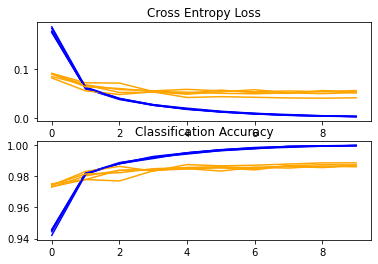

Accuracy: mean=98.717 std=0.081, n=5


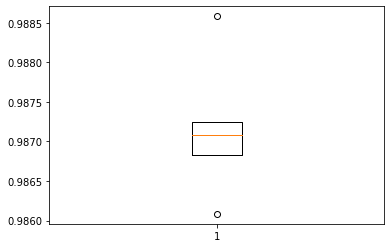

In [70]:
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

In [71]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [72]:
# evaluate model
scores, histories = evaluate_model(trainX, trainY)
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

(48000, 28, 28, 1)
> 98.667
(48000, 28, 28, 1)
> 98.642
(48000, 28, 28, 1)


KeyboardInterrupt: 

In [9]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [10]:
# evaluate model
scores, histories = evaluate_model(trainX, trainY)
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

C:\Users\coyul\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


(48000, 28, 28, 1)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\coyul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-66c81132b05b>", line 2, in <module>
    scores, histories = evaluate_model(trainX, trainY)
  File "<ipython-input-6-c96784a96191>", line 14, in evaluate_model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  File "C:\Users\coyul\anaconda3\lib\site-packages\keras\engine\training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\coyul\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\coyul\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 917, in _call
    return self._stateless_fn(*args, **kwds)  # pylint: disable=not-callable
  File "C:\Users\coyul\a

TypeError: object of type 'NoneType' has no len()

In [14]:
# run the test harness for evaluating a model
model = define_model()
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
model.save('final_model.h5')


In [20]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	predict_x = model.predict(img)
	digit=np.argmax(predict_x,axis=1)
	print(digit[0])

# entry point, run the example
run_example()

7
